# K-Nearest Neighbors(KNN)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)

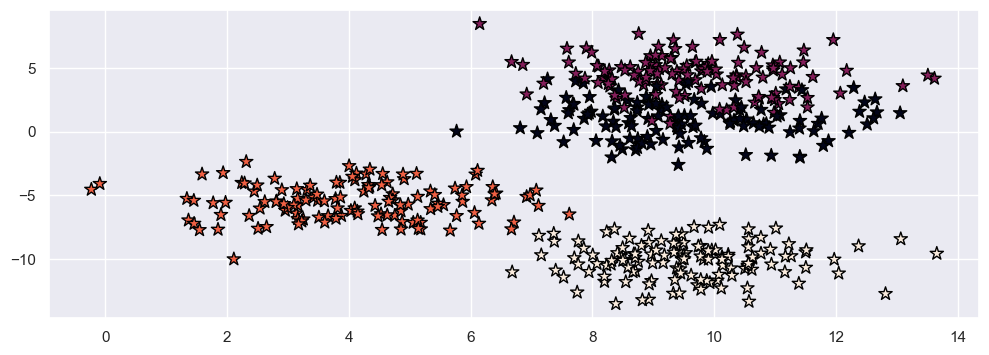

In [4]:
sns.set_theme()
plt.figure(figsize=(12,4))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
plt.show()

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.32,random_state=4)

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)

In [7]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
y_pred = knn.predict(X_test)

In [9]:
acc = accuracy_score(y_test,y_pred)
acc*100

92.5

Text(0.5, 1.0, 'Predicted values with k=3')

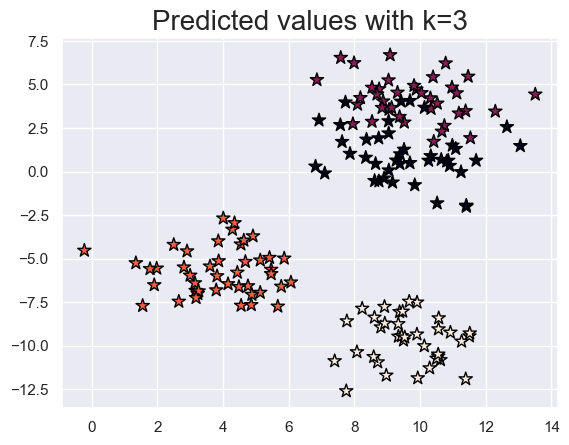

In [10]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=3", fontsize=20)

In [11]:
acc_scores = []
neighbor_numbers = []

In [12]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_scores.append(acc)
    neighbor_numbers.append(i)
    print('accuracy score with {} neighbour: {:.2f}%'.format(i, acc * 100))

accuracy score with 1 neighbour: 90.62%
accuracy score with 2 neighbour: 90.00%
accuracy score with 3 neighbour: 92.50%
accuracy score with 4 neighbour: 90.62%
accuracy score with 5 neighbour: 91.88%
accuracy score with 6 neighbour: 92.50%
accuracy score with 7 neighbour: 93.12%
accuracy score with 8 neighbour: 91.88%
accuracy score with 9 neighbour: 93.12%


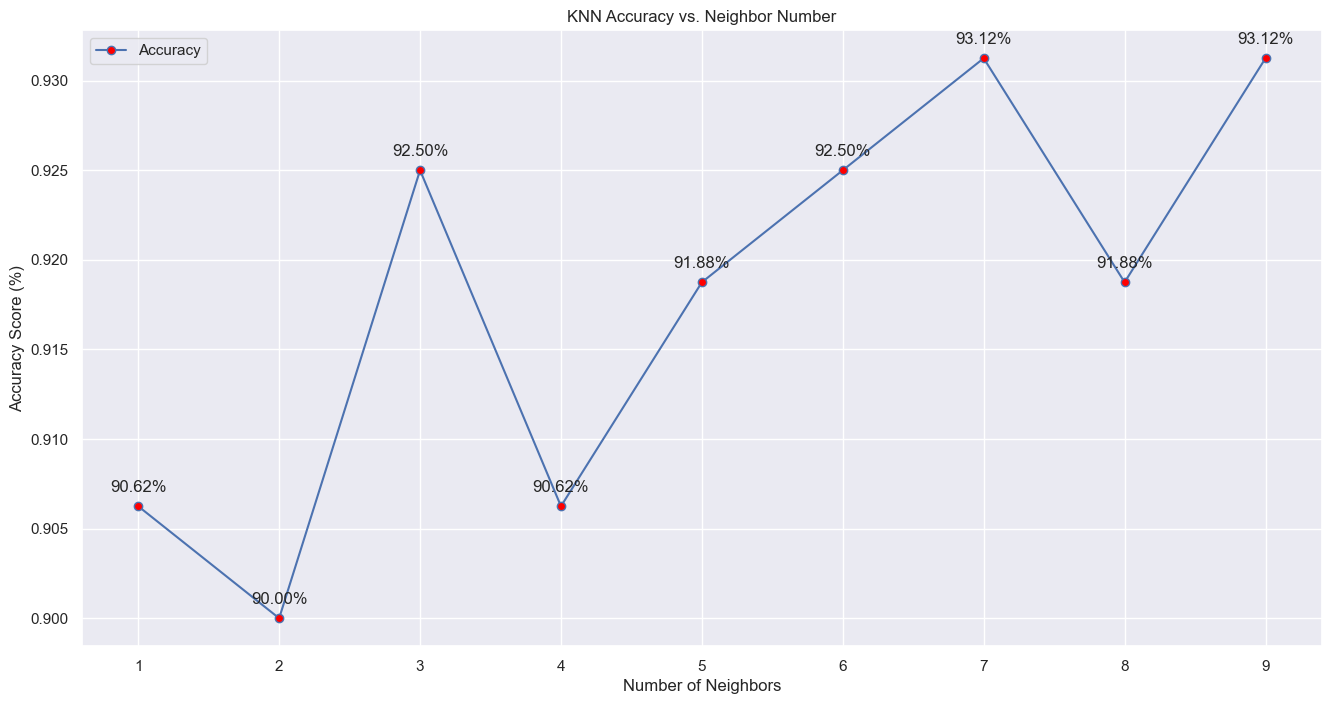

In [13]:
plt.figure(figsize=(16, 8))
plt.plot(neighbor_numbers, acc_scores, marker='o',markerfacecolor='red', label='Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score (%)')
plt.title('KNN Accuracy vs. Neighbor Number')
for i, (neighbor, acc) in enumerate(zip(neighbor_numbers, acc_scores)):
  plt.annotate("{:.2f}%".format(acc * 100), (neighbor, acc), textcoords="offset points", xytext=(0, 10), ha='center')
plt.legend()
plt.grid(True)
plt.show()

observation: From this graph we can conclude that on value of n 7 & 9 we get maximum accuracy where as at n = 2 we get lowest

## parameters of KNNs

KNeighborsClassifier(
    n_neighbors=5, *,
    weights='uniform',
    algorithm='auto', 
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None
)

1. n_neighbors:-
            default = 5,
2. weights:-
            default=’uniform’
            {‘uniform’, ‘distance’}
3. algorithm:-
           default = 'auto'
           {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
4. leaf_size:- {this is passed to BallTree or KDTree}
           default=30
5. p:-
           default=2
          {'manhattan_distance':1,'euclidean_distance':2,'minkowski_distance':arbitrary}
6. metric:-
           default='minkowski'

In [23]:
parameter = {
    'n_neighbors': range(1, 11), 
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': range(1, 11), 
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'mahalanobis', 'seuclidean', 'wminkowski', 'canny'], 
    'p': [1, 2, float('inf')],
}
knn = KNeighborsClassifier()

In [24]:
cv = GridSearchCV(knn,param_grid=parameter,cv=5,scoring='accuracy')

In [25]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(1, 11),
                         'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev', 'mahalanobis', 'seuclidean',
                                    'wminkowski', 'canny'],
                         'n_neighbors': range(1, 11), 'p': [1, 2, inf],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [26]:
cv.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'euclidean',
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

In [27]:
y_pred = cv.predict(X_test)

In [28]:
acc = accuracy_score(y_test,y_pred)
acc*100

91.25